In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from utils import Visualize
from dataloader import DataLoader
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16,VGG19, ResNet50,InceptionV3,Xception
from model import ChimCLR,make_model, autoencoder
from train import train_model
import config

In [3]:
tf.random.set_seed(42)

MODELS = [VGG16,VGG19, ResNet50,InceptionV3,Xception]
def normalize(x):
    return (x -  x.mean(axis = 0, keepdims =  True))/ x.std(axis = 0, keepdims = True)


2114  1 second audio samples created successfully
Epoch 1/40
238/238 [==============================] - 8s 24ms/step - loss: 0.4709 - val_loss: 0.3483
Epoch 2/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3946 - val_loss: 0.3080
Epoch 3/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3821 - val_loss: 0.3132
Epoch 4/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3591 - val_loss: 0.2953
Epoch 5/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3464 - val_loss: 0.2833
Epoch 6/40
238/238 [==============================] - 5s 22ms/step - loss: 0.3423 - val_loss: 0.2794
Epoch 7/40
238/238 [==============================] - 5s 22ms/step - loss: 0.3312 - val_loss: 0.2729
Epoch 8/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3271 - val_loss: 0.2692
Epoch 9/40
238/238 [==============================] - 5s 21ms/step - loss: 0.3207 - val_loss: 0.2782
Epoch 10/40
238/238 [====================

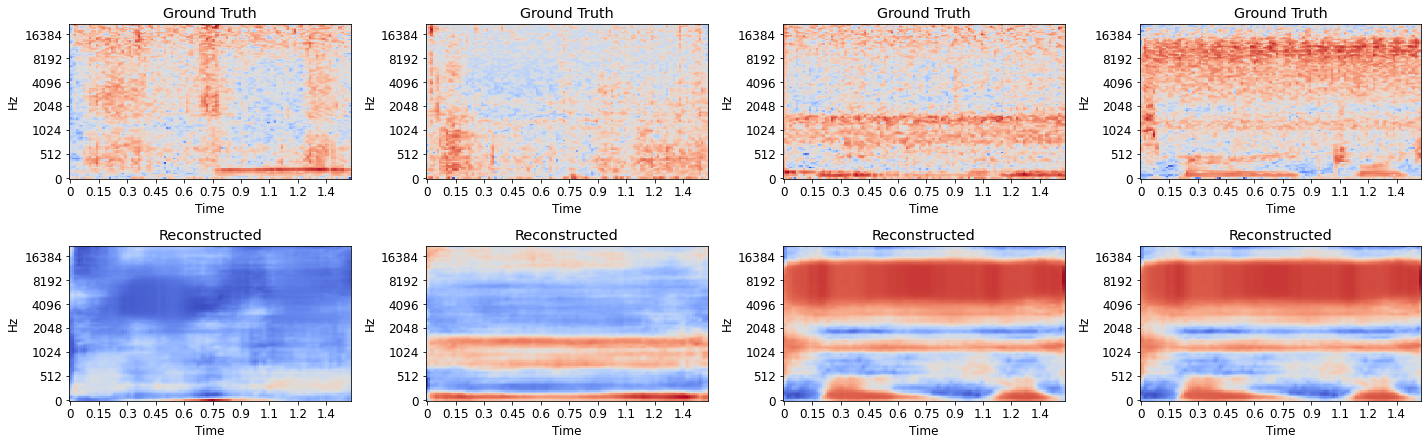

In [4]:
viz =  Visualize(config.figures['figpath'])
dl =  DataLoader(datapath = config.data['file_path2'])
dl.load()
X =  dl.X 
X =  (X - X.mean(axis=0, keepdims=True))/X.std(axis=0,keepdims=True)
input_shape =  (X.shape[1],X.shape[2],1)
output =  len(dl.CLASSES)
X = X[...,np.newaxis]
X_train,X_test,y_train,y_test = train_test_split(X,dl.y, test_size=0.1, shuffle=True)

encoder, decoder,conv_autoencoder = autoencoder(input_shape)
history = conv_autoencoder.fit(X_train, X_train, batch_size=8, epochs=40, validation_data=(X_test, X_test))



sample_idx = np.random.randint(0,X_train.shape[0], 4)
samples = X_train[sample_idx]
latent =  encoder(samples).numpy()
decoded  =  decoder(latent).numpy() 
fig = plt.figure(1, figsize = (20,12))
locs = [4,5,6,7]
j  = 1
for i, (s, d) in enumerate(zip(samples, decoded)):
    ax = plt.subplot(4,4,i+1)
    d = d.reshape(128, 128)
    d =  normalize(d)
    librosa.display.specshow(s.reshape(128, 128), sr=config.audio['SAMPLE_RATE'],x_axis='time', y_axis='mel', hop_length=config.audio['HOP_LENGTH'])
    plt.title("Ground Truth")
    ax = plt.subplot(4,4,i+4)
    librosa.display.specshow(d, sr=config.audio['SAMPLE_RATE'],x_axis='time', y_axis='mel',hop_length=config.audio['HOP_LENGTH'])
    plt.title("Reconstructed")
    if(i == 3):
        ax = plt.subplot(4,4,i+5)
        librosa.display.specshow(d, sr=config.audio['SAMPLE_RATE'], x_axis='time', y_axis='mel',hop_length=config.audio['HOP_LENGTH'])
        plt.title("Reconstructed")
plt.tight_layout()
plt.savefig(f'{config.figures["figpath"]}/Reconstruction_Chart.png', bbox_inches ="tight", dpi=300)
plt.show()

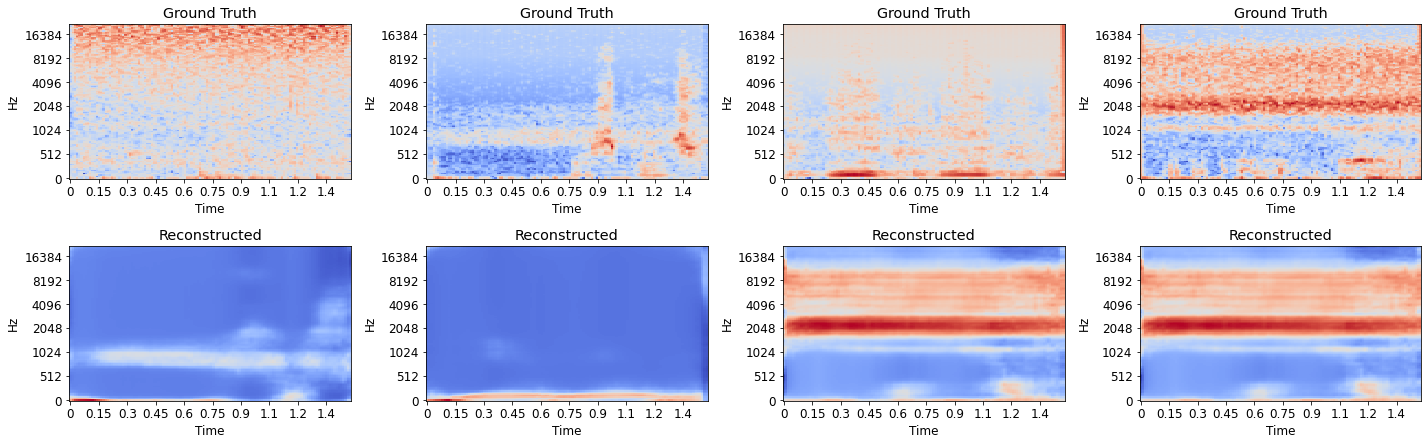

In [49]:
sample_idx = np.random.randint(0,X_train.shape[0], 4)
samples = X_train[sample_idx]
latent =  encoder.predict(samples)
decoded  =  decoder.predict(latent)
fig = plt.figure(1, figsize = (20,12))
locs = [4,5,6,7]
j  = 1
for i, (s, d) in enumerate(zip(samples, decoded)):
    ax = plt.subplot(4,4,i+1)
    d = d.reshape(128, 128)
    d =  normalize(d)
    librosa.display.specshow(s.reshape(128, 128), sr=config.audio['SAMPLE_RATE'],x_axis='time', y_axis='mel', hop_length=config.audio['HOP_LENGTH'])
    plt.title("Ground Truth")
    ax = plt.subplot(4,4,i+4)
    librosa.display.specshow(d, sr=config.audio['SAMPLE_RATE'],x_axis='time', y_axis='mel',hop_length=config.audio['HOP_LENGTH'])
    plt.title("Reconstructed")
    if(i == 3):
        ax = plt.subplot(4,4,i+5)
        librosa.display.specshow(d, sr=config.audio['SAMPLE_RATE'], x_axis='time', y_axis='mel',hop_length=config.audio['HOP_LENGTH'])
        plt.title("Reconstructed")
plt.tight_layout()
plt.savefig(f'{config.figures["figpath"]}/Reconstruction_Chart_Chim.png', bbox_inches ="tight", dpi=300)
plt.show()

In [51]:
dl.X_.shape

(2114, 128, 128)

In [52]:
X_ =  encoder.predict(tf.expand_dims(dl.X_, -1))

In [53]:
from sklearn.manifold import TSNE
X = np.asarray(X_, dtype='float64')

In [60]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=90, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 2114 samples in 0.004s...
[t-SNE] Computed neighbors for 2114 samples in 0.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2114
[t-SNE] Computed conditional probabilities for sample 2000 / 2114
[t-SNE] Computed conditional probabilities for sample 2114 / 2114
[t-SNE] Mean sigma: 13.611488
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.348278
[t-SNE] KL divergence after 1000 iterations: 0.709122


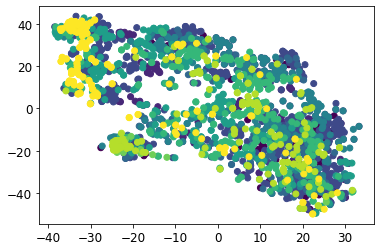

In [62]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c =  list(dl.y))

In [65]:
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA

In [81]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(dl.X_.reshape(dl.X_.shape[0],-1))
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=123)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2114 samples in 0.000s...
[t-SNE] Computed neighbors for 2114 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2114
[t-SNE] Computed conditional probabilities for sample 2000 / 2114
[t-SNE] Computed conditional probabilities for sample 2114 / 2114
[t-SNE] Mean sigma: 10.299626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.882927
[t-SNE] KL divergence after 300 iterations: 1.161861


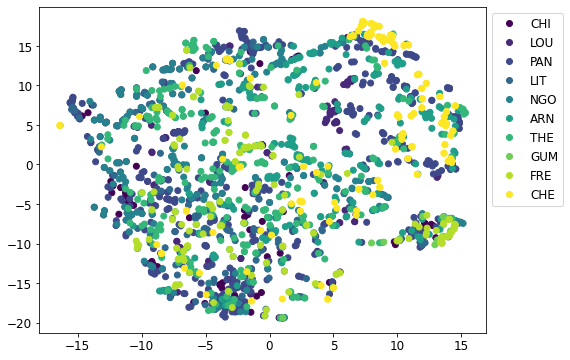

In [84]:
plt.figure(1, figsize=(8,6))
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c =  list(dl.y))
plt.legend(handles=scatter.legend_elements()[0], labels=dl.CLASSES,bbox_to_anchor=(1.0, 1.0))